# Notebook to generate the charts for the baseline, large interval runs of the model.

In [2]:
# import packages
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import datetime as dt
import random as random
import pandas as pd
import seaborn as sns
import statsmodels

# get current working directory to load and save files
thedir = os.getcwd()

# use cwd to to get folders containing figures and data
datadir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/model_results'))
figdir = os.path.abspath(os.path.join(os.path.dirname(thedir), '..', 'acrop/figures'))

# define depths used in random_baseline data generation
depths = [10,25]
# load files
seas_ = []
stats_ = []
for i in depths:
    stat = pd.read_csv(F'{datadir}/agg_by_runs_{i}.csv')
    stat["depth"] = i
    stat.reset_index(inplace=True,drop = False)
    stats_.append(stat)
    seas = pd.read_csv(F'{datadir}/agg_by_season_{i}.csv')
    seas["depth"] = i
    seas.reset_index(inplace=True,drop = False)
    seas_.append(seas)

# concatonate the three loaded results into one df for runs and one for seasons
for i in range(len(stats_)):
    if i == 0:
        merged = pd.DataFrame()
        merged_=pd.DataFrame()
    merged = pd.concat([merged,stats_[i]],axis=0)
    merged_ = pd.concat([merged_,seas_[i]],axis =0)
merged.to_csv(F"{datadir}/all_results_baseline.csv")

In [27]:
top = merged.nlargest(15,["Yield (tonne/ha)_mean"])
top.reset_index(inplace=True,drop=True)
top = top[["Yield (tonne/ha)_mean",'irrigation_1',
       'irrigation_2', 'depth']]
top

,Yield (tonne/ha)_mean,irrigation_1,irrigation_2,depth
0,5.117277,35,103,25
1,5.117229,36,103,25
2,5.117229,36,103,25
3,5.110065,39,103,25
4,5.110065,39,103,25
5,5.092319,39,101,25
6,5.071903,39,98,25
7,5.066546,42,102,25
8,5.065056,35,97,25
9,5.063075,88,105,25


In [26]:
top = top[["Yield (tonne/ha)_mean",'irrigation_1',
       'irrigation_2', 'depth']]
top

,Yield (tonne/ha)_mean,irrigation_1,irrigation_2,depth
0,5.117277,35,103,25
1,5.117229,36,103,25
2,5.117229,36,103,25
3,5.110065,39,103,25
4,5.110065,39,103,25
5,5.092319,39,101,25
6,5.071903,39,98,25
7,5.066546,42,102,25
8,5.065056,35,97,25
9,5.063075,88,105,25


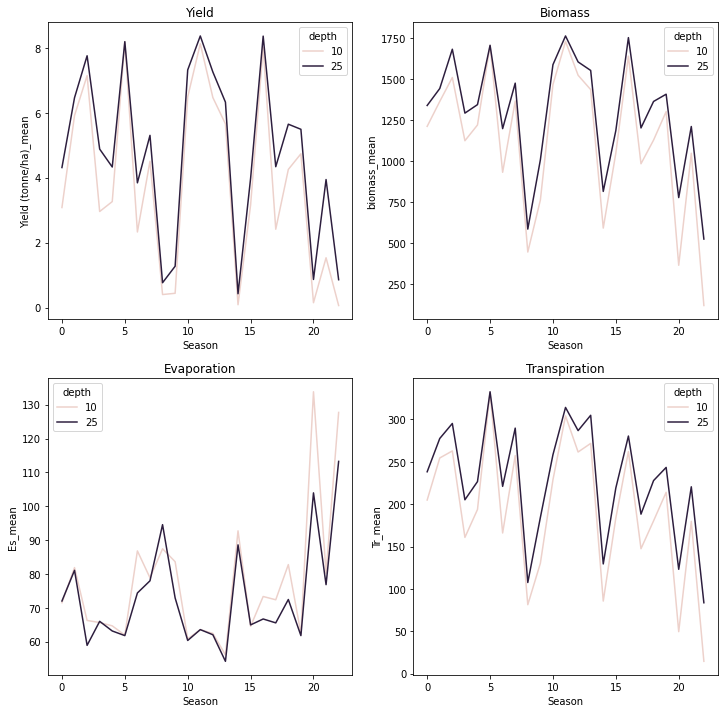

In [2]:
# plot the seasonal data
fig, axs = plt.subplots(2,2,figsize=(12,12))
merged_.reset_index(inplace=True,drop=True)
data = merged_
sns.lineplot(data = data, x = 'Season',y = 'Yield (tonne/ha)_mean', hue = 'depth',ax =axs[0,0])
axs[0,0].set_title('Yield')
sns.lineplot(data = data, x = 'Season',y = 'biomass_mean', hue = 'depth',ax =axs[0,1])
axs[0,1].set_title('Biomass')
sns.lineplot(data = data, x = 'Season',y = 'Es_mean', hue = 'depth',ax =axs[1,0])
axs[1,0].set_title('Evaporation')
sns.lineplot(data = data, x = 'Season',y = 'Tr_mean', hue = 'depth',ax =axs[1,1])
axs[1,1].set_title('Transpiration')
plt.savefig(F"{figdir}/seasonal")

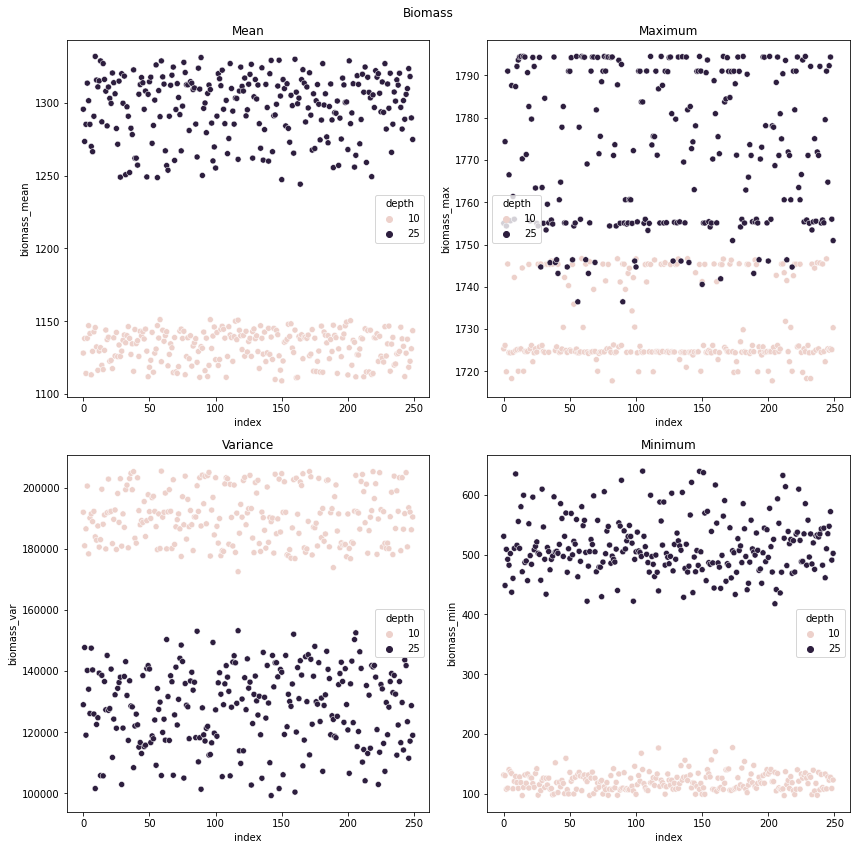

In [3]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['biomass_mean','depth','index']]
sns.scatterplot(data=data,x='index',y='biomass_mean',hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['biomass_max','depth','index']]
sns.scatterplot(data=data,x='index',y='biomass_max',hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['biomass_var','depth','index']]
sns.scatterplot(data=data,x='index',y='biomass_var',hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['biomass_min','depth','index']]
sns.scatterplot(data=data,x='index',y='biomass_min',hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Biomass")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_biomass")

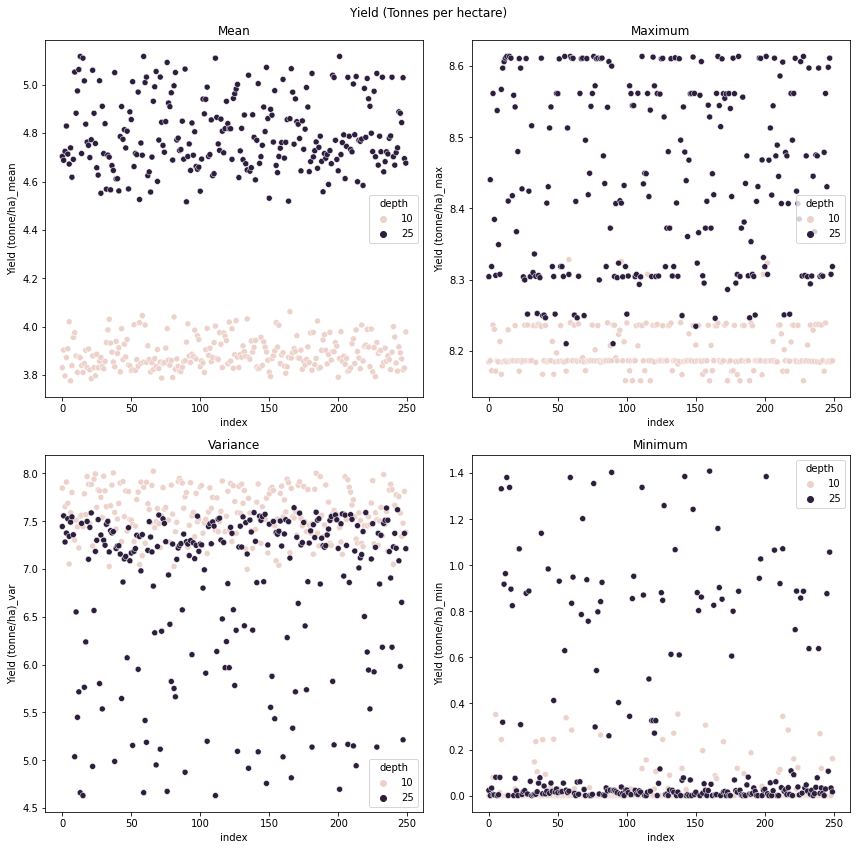

In [4]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Yield (tonne/ha)_mean','depth','index']]
sns.scatterplot(data=data,x='index',y="Yield (tonne/ha)_mean",hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['Yield (tonne/ha)_max','depth','index']]
sns.scatterplot(data=data,x='index',y="Yield (tonne/ha)_max",hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['Yield (tonne/ha)_var','depth','index']]
sns.scatterplot(data=data,x='index',y="Yield (tonne/ha)_var",hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['Yield (tonne/ha)_min','depth','index']]
sns.scatterplot(data=data,x='index',y="Yield (tonne/ha)_min",hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Yield (Tonnes per hectare)")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_yield")

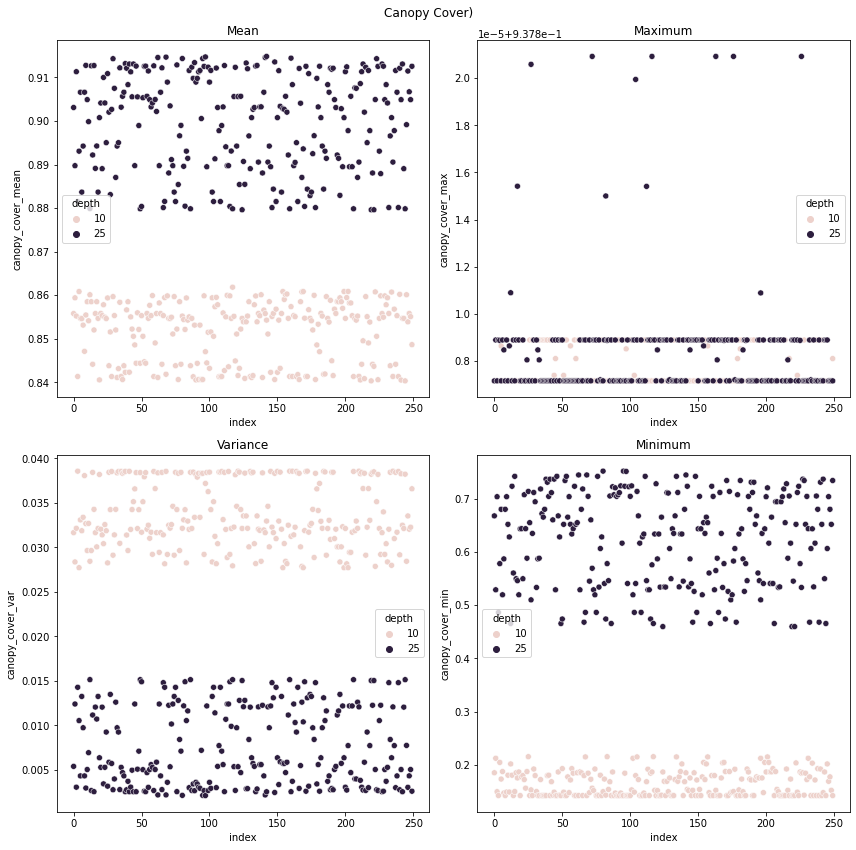

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['canopy_cover_mean','depth','index']]
sns.scatterplot(data=data,x='index',y="canopy_cover_mean",hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['canopy_cover_max','depth','index']]
sns.scatterplot(data=data,x='index',y="canopy_cover_max",hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['canopy_cover_var','depth','index']]
sns.scatterplot(data=data,x='index',y="canopy_cover_var",hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['canopy_cover_min','depth','index']]
sns.scatterplot(data=data,x='index',y="canopy_cover_min",hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Canopy Cover)")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_canopy_cover")

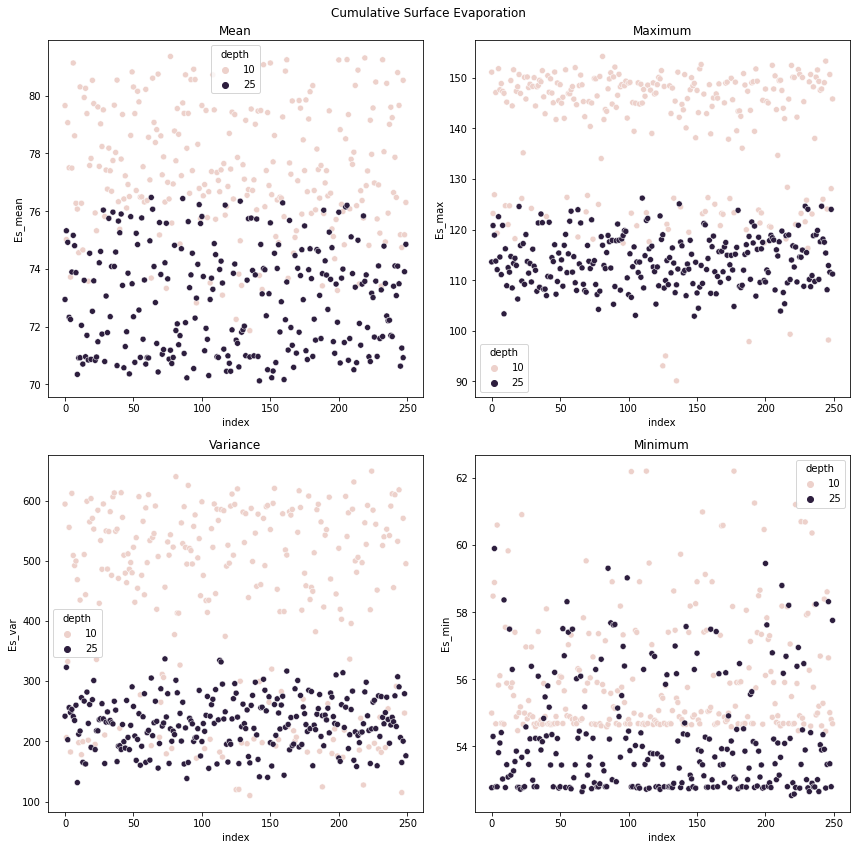

In [6]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Es_mean','depth','index']]
sns.scatterplot(data=data,x='index',y="Es_mean",hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['Es_max','depth','index']]
sns.scatterplot(data=data,x='index',y="Es_max",hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['Es_var','depth','index']]
sns.scatterplot(data=data,x='index',y="Es_var",hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['Es_min','depth','index']]
sns.scatterplot(data=data,x='index',y="Es_min",hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Cumulative Surface Evaporation")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_Es")

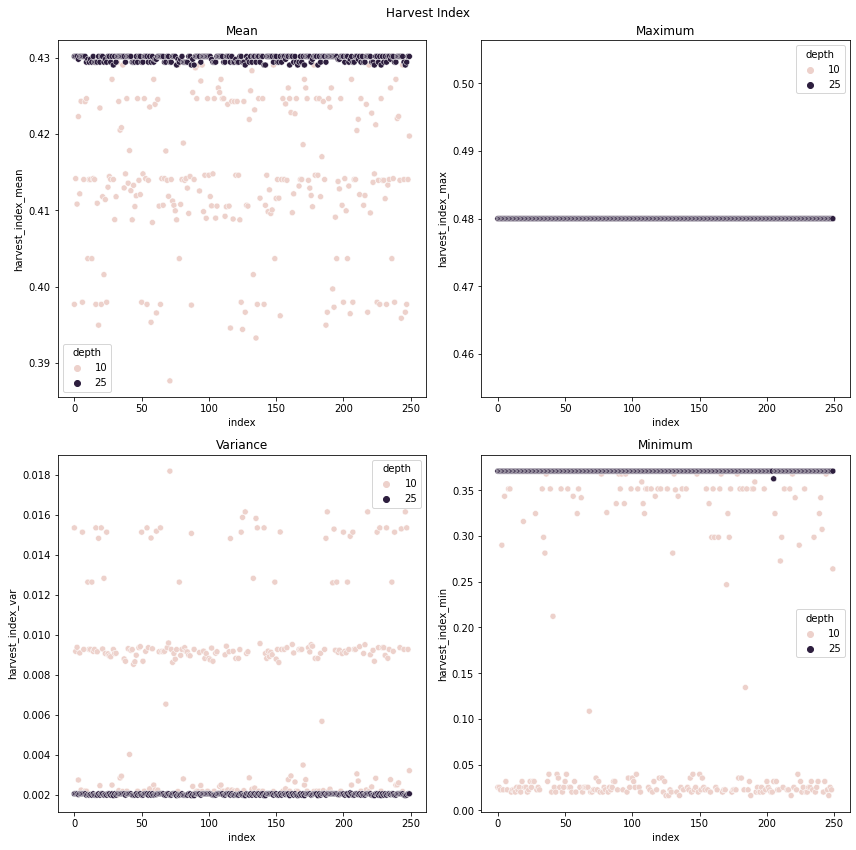

In [7]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['harvest_index_mean','depth','index']]
sns.scatterplot(data=data,x='index',y="harvest_index_mean",hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['harvest_index_max','depth','index']]
sns.scatterplot(data=data,x='index',y="harvest_index_max",hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['harvest_index_var','depth','index']]
sns.scatterplot(data=data,x='index',y="harvest_index_var",hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['harvest_index_min','depth','index']]
sns.scatterplot(data=data,x='index',y="harvest_index_min",hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Harvest Index")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_harvest_index")

In [8]:
merged.columns

Index(['index', 'Unnamed: 0', 'run', 'Yield (tonne/ha)_mean',
       'Yield (tonne/ha)_min', 'Yield (tonne/ha)_max',
       'Yield (tonne/ha)_median', 'Yield (tonne/ha)_var', 'biomass_mean',
       'biomass_min', 'biomass_max', 'biomass_median', 'biomass_var',
       'harvest_index_mean', 'harvest_index_min', 'harvest_index_max',
       'harvest_index_median', 'harvest_index_var', 'canopy_cover_mean',
       'canopy_cover_min', 'canopy_cover_max', 'canopy_cover_median',
       'canopy_cover_var', 'Es_mean', 'Es_min', 'Es_max', 'Es_median',
       'Es_var', 'Tr_mean', 'Tr_min', 'Tr_max', 'Tr_median', 'Tr_var',
       'DeepPerc_mean', 'DeepPerc_min', 'DeepPerc_max', 'DeepPerc_median',
       'DeepPerc_var', 'CR_mean', 'CR_min', 'CR_max', 'CR_median', 'CR_var',
       'date_1', 'date_2', 'irrig_1', 'irrig_2', 'irrigation_1',
       'irrigation_2', 'depth'],
      dtype='object')

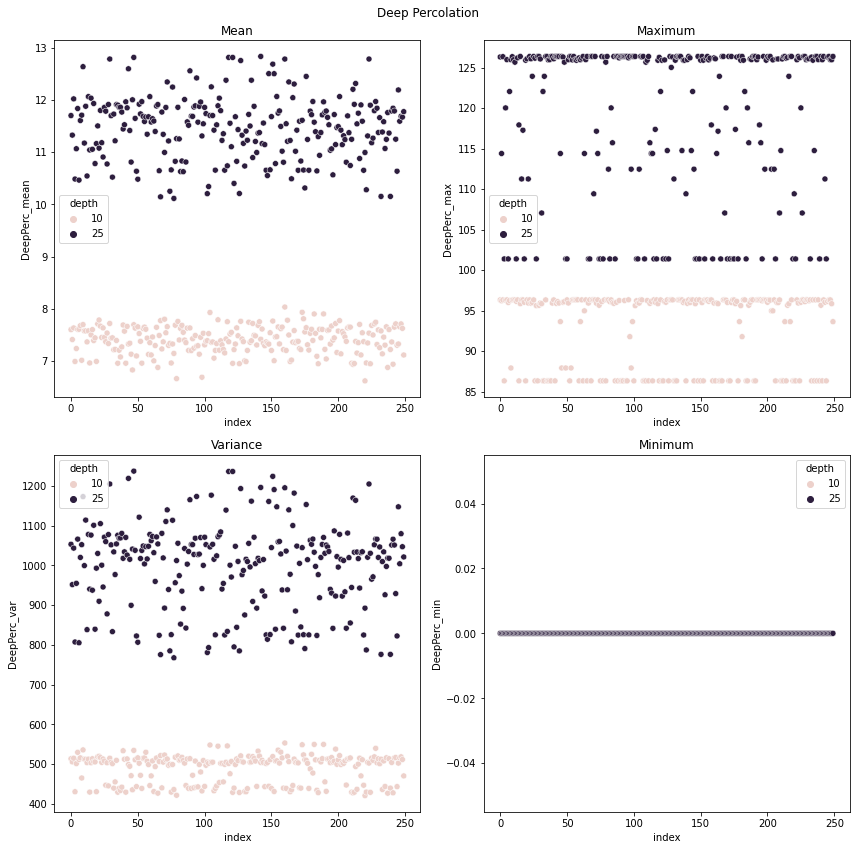

In [9]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['DeepPerc_mean','depth','index']]
sns.scatterplot(data=data,x='index',y="DeepPerc_mean",hue='depth',ax=axs[0,0])
sns.lineplot()
axs[0,0].set_title('Mean')
data = data_[['DeepPerc_max','depth','index']]
sns.scatterplot(data=data,x='index',y="DeepPerc_max",hue='depth',ax=axs[0,1])
axs[0,1].set_title('Maximum')
data = data_[['DeepPerc_var','depth','index']]
sns.scatterplot(data=data,x='index',y="DeepPerc_var",hue='depth',ax=axs[1,0])
axs[1,0].set_title('Variance')
data = data_[['DeepPerc_min','depth','index']]
sns.scatterplot(data=data,x='index',y="DeepPerc_min",hue='depth',ax=axs[1,1])
axs[1,1].set_title('Minimum')
plt.suptitle("Deep Percolation")
plt.tight_layout()
plt.savefig(F"{figdir}/runs_baseline_DeepPerc")

In [10]:
merged.columns

Index(['index', 'Unnamed: 0', 'run', 'Yield (tonne/ha)_mean',
       'Yield (tonne/ha)_min', 'Yield (tonne/ha)_max',
       'Yield (tonne/ha)_median', 'Yield (tonne/ha)_var', 'biomass_mean',
       'biomass_min', 'biomass_max', 'biomass_median', 'biomass_var',
       'harvest_index_mean', 'harvest_index_min', 'harvest_index_max',
       'harvest_index_median', 'harvest_index_var', 'canopy_cover_mean',
       'canopy_cover_min', 'canopy_cover_max', 'canopy_cover_median',
       'canopy_cover_var', 'Es_mean', 'Es_min', 'Es_max', 'Es_median',
       'Es_var', 'Tr_mean', 'Tr_min', 'Tr_max', 'Tr_median', 'Tr_var',
       'DeepPerc_mean', 'DeepPerc_min', 'DeepPerc_max', 'DeepPerc_median',
       'DeepPerc_var', 'CR_mean', 'CR_min', 'CR_max', 'CR_median', 'CR_var',
       'date_1', 'date_2', 'irrig_1', 'irrig_2', 'irrigation_1',
       'irrigation_2', 'depth'],
      dtype='object')

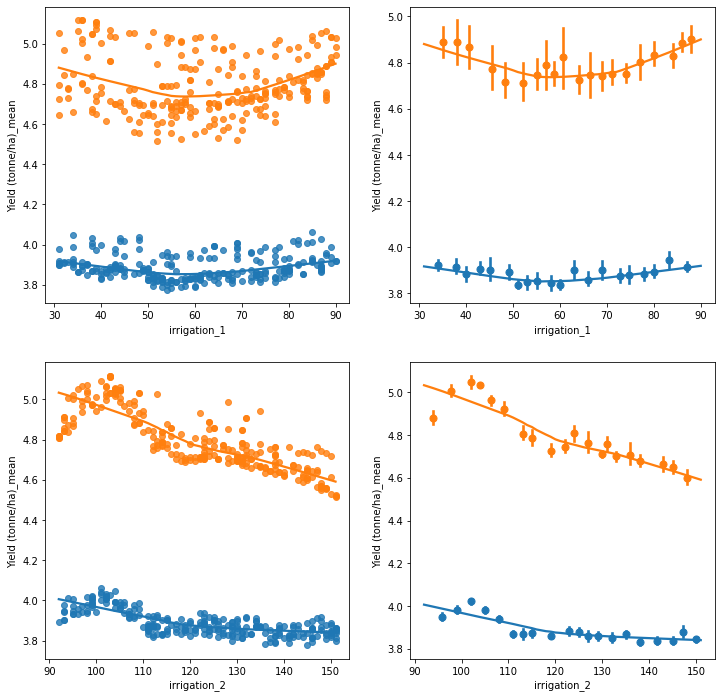

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Yield (tonne/ha)_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Yield (tonne/ha)_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-yield")

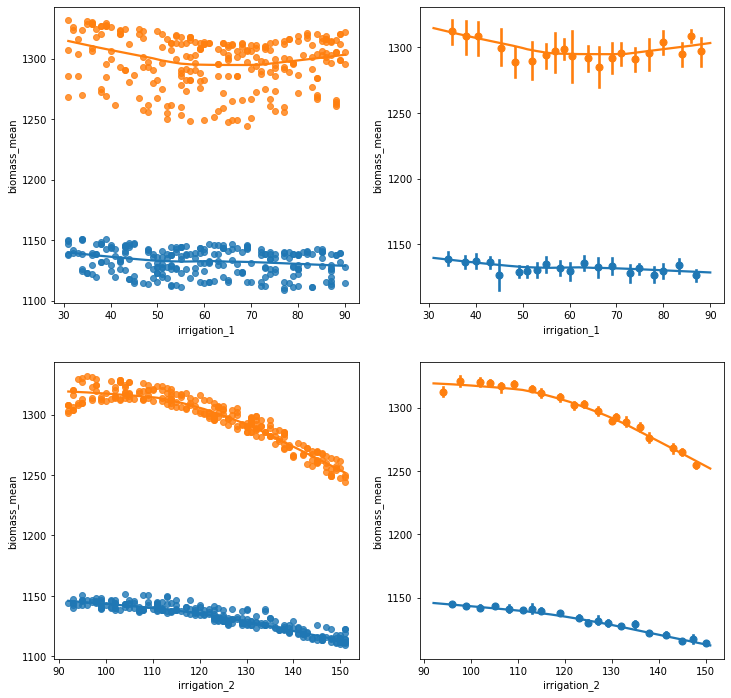

In [12]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['biomass_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="biomass_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="biomass_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="biomass_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="biomass_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="biomass_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="biomass_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="biomass_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="biomass_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-biomass")

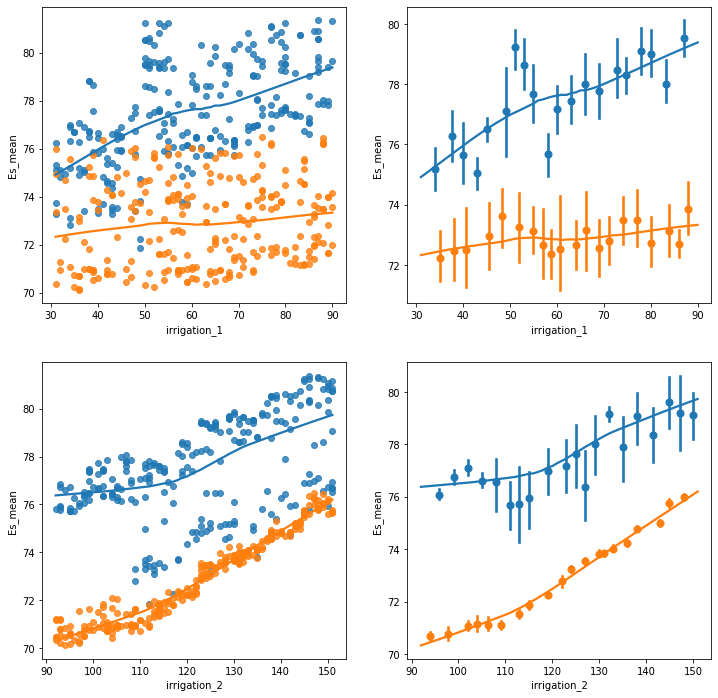

In [13]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Es_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Es_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Es_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Es_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Es_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Es_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Es_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Es_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Es_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-Es")

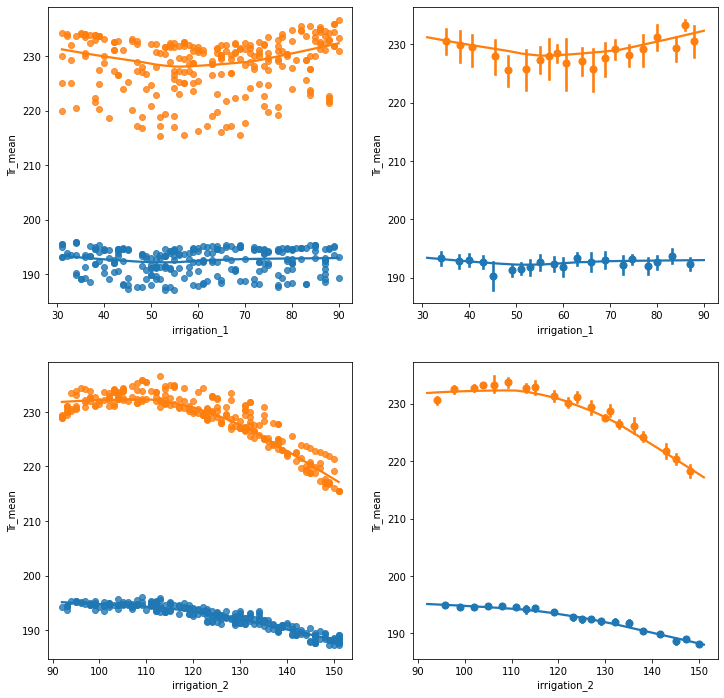

In [14]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['Tr_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Tr_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Tr_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="Tr_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="Tr_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Tr_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Tr_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="Tr_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="Tr_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-Tr")

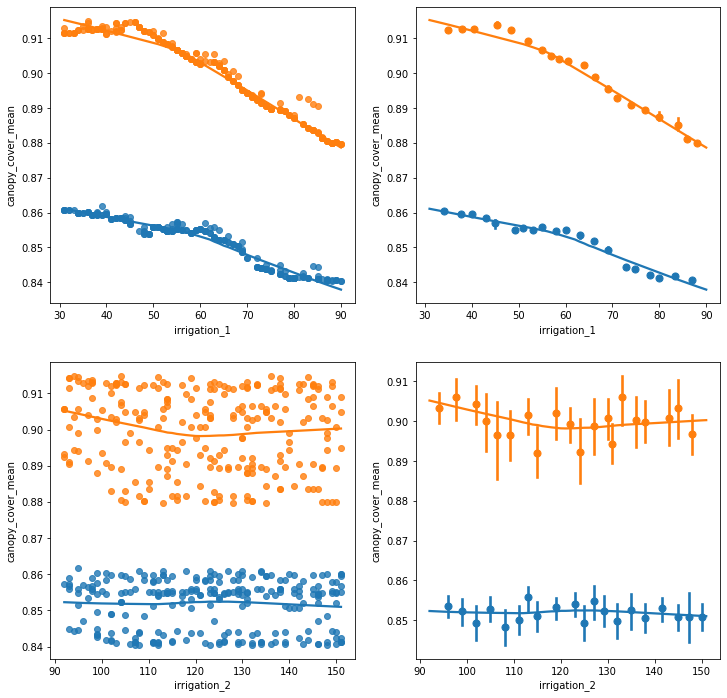

In [15]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['canopy_cover_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="canopy_cover_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="canopy_cover_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="canopy_cover_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="canopy_cover_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="canopy_cover_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="canopy_cover_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="canopy_cover_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="canopy_cover_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-canopy_cover")

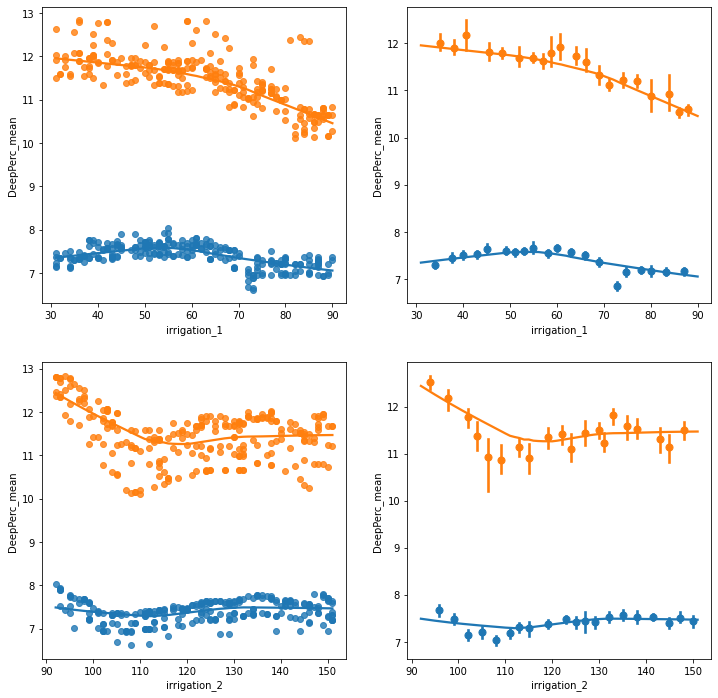

In [16]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['DeepPerc_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="DeepPerc_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="DeepPerc_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="DeepPerc_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="DeepPerc_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="DeepPerc_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="DeepPerc_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="DeepPerc_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="DeepPerc_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-DeepPerc")

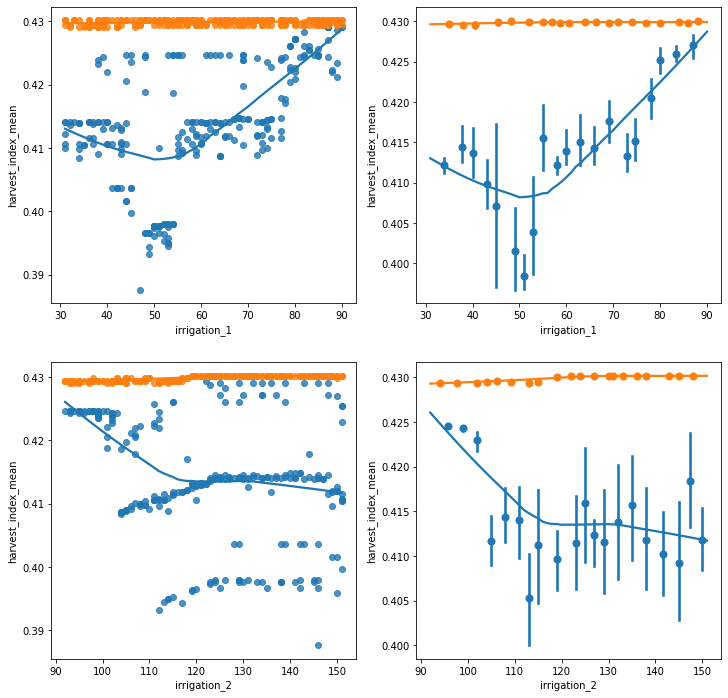

In [17]:
fig, axs = plt.subplots(2,2,figsize=(12,12))
data_ = merged
data = data_[['harvest_index_mean','depth','irrigation_1','irrigation_2']]
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="harvest_index_mean",data = data_f,ax = axs[0,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="harvest_index_mean",data = data_f,ax = axs[0,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_1", y="harvest_index_mean",data = data_f,ax = axs[0,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_1", y="harvest_index_mean",data = data_f,ax = axs[0,1],lowess = True,x_bins = 20);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="harvest_index_mean",data = data_f,ax = axs[1,0], lowess = True,scatter = True);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="harvest_index_mean",data = data_f,ax = axs[1,0],lowess = True,scatter = True);
data_f = data[data.depth== 10]
sns.regplot(x="irrigation_2", y="harvest_index_mean",data = data_f,ax = axs[1,1], lowess = True,x_bins = 20);
data_f = data[data.depth== 25]
sns.regplot(x="irrigation_2", y="harvest_index_mean",data = data_f,ax = axs[1,1],lowess = True,x_bins = 20);
plt.savefig(F"{figdir}/reg-plot-harvest_index")